In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd/content/drive/My Drive/data

/content/drive/My Drive/data


In [199]:
import pandas as pd
import urllib
import time
import re
import matplotlib.pyplot as plt

    
from urllib.request import urlopen
from bs4 import BeautifulSoup

## 네이버 금융에서 모나리자 종가 데이터 가져오기

In [200]:

stockItem = '012690'

timestamp = []
closing_price = []


url = 'http://finance.naver.com/item/sise_day.nhn?code='+ stockItem
html = urlopen(url) 
source = BeautifulSoup(html.read(), "html.parser")
 
maxPage=source.find_all("table",align="center")

                                            
for page in range(1, 3):
  print (str(page) )
  url = 'http://finance.naver.com/item/sise_day.nhn?code=' + stockItem +'&page='+ str(page)
  html = urlopen(url)
  source = BeautifulSoup(html.read(), "html.parser")
  srlists=source.find_all("tr")
  isCheckNone = None
   
  if((page % 1) == 0):
    time.sleep(1.50)
 
  for i in range(1,len(srlists)-1):
   if(srlists[i].span != isCheckNone):
     
    srlists[i].td.text
    print(srlists[i].find_all("td",align="center")[0].text, srlists[i].find_all("td",class_="num")[0].text )
    timestamp.append(srlists[i].find_all("td",align="center")[0].text)
    closing_price.append(srlists[i].find_all("td",class_="num")[0].text)

1
2020.02.14 4,770
2020.02.13 4,705
2020.02.12 4,515
2020.02.11 4,820
2020.02.10 5,310
2020.02.07 5,760
2020.02.06 5,950
2020.02.05 5,910
2020.02.04 5,860
2020.02.03 6,520
2
2020.01.31 9,130
2020.01.30 7,420
2020.01.29 7,400
2020.01.28 8,090
2020.01.23 6,230
2020.01.22 5,980
2020.01.21 4,600
2020.01.20 4,430
2020.01.17 3,980
2020.01.16 3,975


In [201]:
timestamp = pd.Series(timestamp, name = 'timestamp')
closing_price = pd.Series(closing_price, name='closing_price')
모나리자_df = pd.DataFrame([timestamp, closing_price]).T

## '신종 코로나'와 '우한 폐렴' 구글 트렌드 데이터 불러오기

In [202]:
trend_coro = pd.read_csv('multiTimeline(신종코로나).csv')
trend_wuhan = pd.read_csv('multiTimeline(우한폐렴).csv')

## 데이터 전처리

In [203]:
trend_coro = trend_coro.iloc[1:,:]
trend_coro.rename(columns = {'카테고리: 모든 카테고리' : 'relative_frequency'}, inplace = True)

trend_wuhan = trend_wuhan.iloc[1:,:]
trend_wuhan.rename(columns = {'카테고리: 모든 카테고리' : 'relative_frequency'}, inplace = True)



trend_coro['relative_frequency'] = trend_coro['relative_frequency'].replace("<1", "0")
trend_wuhan['relative_frequency'] = trend_wuhan['relative_frequency'].replace("<1", "0")

trend_coro['relative_frequency'] = trend_coro['relative_frequency'].astype(float)
trend_wuhan['relative_frequency'] = trend_wuhan['relative_frequency'].astype(float)




In [204]:
for i in range(모나리자_df['closing_price'].shape[0]):
    모나리자_df['closing_price'][i] = re.sub('[,]', '', 모나리자_df['closing_price'][i])

In [205]:
모나리자_df['closing_price'] = 모나리자_df['closing_price'].astype(float)

In [206]:
for i in range(모나리자_df['timestamp'].shape[0]):
    모나리자_df['timestamp'][i] = re.sub('[.]', '-', 모나리자_df['timestamp'][i])

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [207]:
모나리자_df.head()

,timestamp,closing_price
0,2020-02-14,4770.0
1,2020-02-13,4705.0
2,2020-02-12,4515.0
3,2020-02-11,4820.0
4,2020-02-10,5310.0


In [208]:
for i in range(모나리자_df['timestamp'].shape[0]):
    모나리자_df['timestamp'][i] = 모나리자_df['timestamp'][i][-5:]

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [209]:
모나리자_df

,timestamp,closing_price
0,02-14,4770.0
1,02-13,4705.0
2,02-12,4515.0
3,02-11,4820.0
4,02-10,5310.0
5,02-07,5760.0
6,02-06,5950.0
7,02-05,5910.0
8,02-04,5860.0
9,02-03,6520.0


In [210]:
모나리자_df.sort_values(by='timestamp', inplace = True)
모나리자_df.set_index('timestamp', inplace = True)

In [211]:
trend_coro.head()

,relative_frequency
2020-01-15,0.0
2020-01-16,0.0
2020-01-17,2.0
2020-01-18,2.0
2020-01-19,0.0


In [212]:
trend_coro.reset_index(inplace= True)
trend_coro.rename(columns = {'index' : 'timestamp'}, inplace = True)

for i in range(trend_coro['timestamp'].shape[0]):
      trend_coro['timestamp'][i] = trend_coro['timestamp'][i][-5:]
        
trend_coro.set_index('timestamp', inplace= True)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [213]:
trend_coro.head()

,relative_frequency
timestamp,
01-15,0.0
01-16,0.0
01-17,2.0
01-18,2.0
01-19,0.0


In [214]:
df = pd.concat([trend_coro, 모나리자_df], axis=1)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [215]:
inp_df = pd.DataFrame({'timestamp' : ['01-17', '01-18', '01-19', '01-20', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-31', '02-01', '02-02', '02-03', '02-07', '02-08', '02-09', '02-10'], 'est_closing_price': [3980, 4130, 4280, 4430, 6230,  6602, 6974, 7346, 7718, 8090, 9130, 8260, 7390, 6520, 5760, 5610, 5460, 5310]})
inp_df.set_index('timestamp', inplace = True)

In [216]:
df = pd.concat([df, inp_df], axis=1)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [217]:
df = df[:-2]

## '신종 코로나' 트렌드와 '모나리자 종가' 겹쳐 그래프 그리기

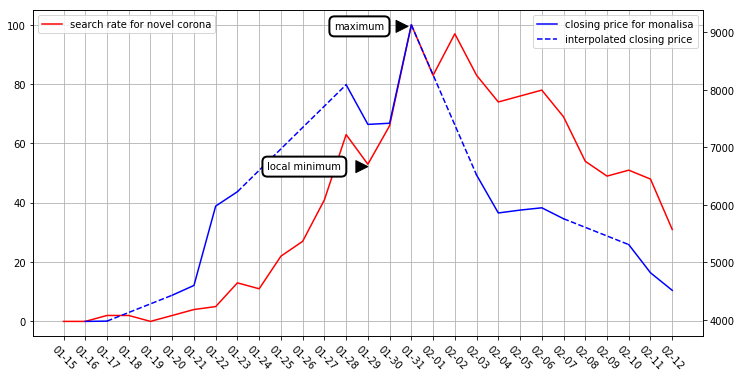

In [218]:
fig, ax1 = plt.subplots()

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=315)
plt.grid(True)
ax1.plot(df['relative_frequency'], color='red', label = 'search rate for novel corona')
plt.legend(loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(df['closing_price'], color = 'blue', label = 'closing price for monalisa')
ax2.plot(df['est_closing_price'], linestyle='--', color = 'blue', label = 'interpolated closing price')


bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
ax2.annotate('local minimum',
            xy=(0.5, 0.52),
            xycoords='axes fraction',
            xytext=(0.35, 0.52),
            bbox=bbox_props,
            arrowprops=
                dict(facecolor='black', shrink=0.5),
                horizontalalignment='left',
                verticalalignment='center')


ax2.annotate('maximum',
            xy=(0.56, 0.95),
            xycoords='axes fraction',
            xytext=(0.45 ,0.95),
            bbox=bbox_props,
            arrowprops=
                dict(facecolor='black', shrink=0.5),
                horizontalalignment='left',
                verticalalignment='center')


plt.legend()
plt.savefig('coro_monalisa.jpg')

## '우한 폐렴' 구글 트렌드 데이터 전처리 

In [219]:
trend_wuhan.reset_index(inplace= True)
trend_wuhan.rename(columns = {'index' : 'timestamp'}, inplace = True)
for i in range(trend_wuhan['timestamp'].shape[0]):
      trend_wuhan['timestamp'][i] = trend_wuhan['timestamp'][i][-5:]

trend_wuhan.set_index('timestamp', inplace= True)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [220]:
df2 = pd.concat([trend_wuhan, 모나리자_df], axis=1)
df2 = pd.concat([df2, inp_df], axis=1)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [221]:
df2 = df2[:-2]

## '우한 폐렴' 트렌드와 '모나리자 종가' 겹쳐 그래프 그리기

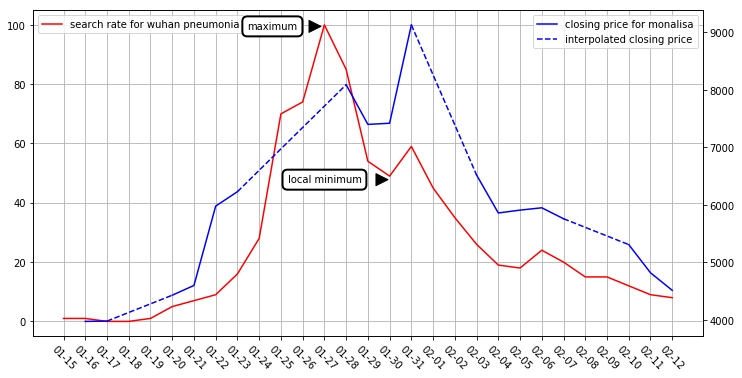

In [222]:
fig, ax1 = plt.subplots()

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=315)
plt.grid(True)
ax1.plot(df2['relative_frequency'], color='red', label = 'search rate for wuhan pneumonia')
plt.legend(loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(df2['closing_price'], color = 'blue', label = 'closing price for monalisa')
ax2.plot(df2['est_closing_price'], linestyle='--', color = 'blue', label = 'interpolated closing price')

bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
ax2.annotate('local minimum',
            xy=(0.53, 0.48),
            xycoords='axes fraction',
            xytext=(0.38, 0.48),
            bbox=bbox_props,
            arrowprops=
                dict(facecolor='black', shrink=0.5),
                horizontalalignment='left',
                verticalalignment='center')

ax2.annotate('maximum',
            xy=(0.43, 0.95),
            xycoords='axes fraction',
            xytext=(0.32 ,0.95),
            bbox=bbox_props,
            arrowprops=
                dict(facecolor='black', shrink=0.5),
                horizontalalignment='left',
                verticalalignment='center')


plt.legend()
plt.savefig('wuhan_monalisa.jpg')